# Notebook 3: Data Mining Techniques
### DSA 2040A Group Project - Lung Cancer Data Analysis
### Team Members: Calvin, Tanveer, Samantha, Patricia, Susan and Arlen

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Scikit-learn for data mining
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# For saving/loading models
import joblib


# Section 1: Load Cleaned Data

In [2]:
CLEANED_DATA = '../data/transformed.csv' 
MODEL_SAVE_PATH = '../models/survival_predictor.pkl' 


df = pd.read_csv(CLEANED_DATA)
print(f"Cleaned data loaded successfully from {CLEANED_DATA}")

# Convert relevant columns to their appropriate types after loading from CSV
if 'diagnosis_date' in df.columns:
    df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
if 'end_treatment_date' in df.columns:
    df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

# Convert string object columns to 'category' dtype for better memory usage and explicit handling
categorical_cols_to_convert = ['gender', 'country', 'cancer_stage', 'smoking_status',
                                'treatment_type', 'age_group', 'bmi_category', 'cholesterol_category']
for col in categorical_cols_to_convert:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype('category')
# convert to 1 and 0(pseudo one hot encoding)
if 'family_history' in df.columns and df['family_history'].dtype == 'object':
        df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0}).astype(int)
if 'survived' in df.columns and df['survived'].dtype != 'int64':
        df['survived'] = df['survived'].astype(int)

print("\nFirst 5 rows of cleaned data:")
print(df.head())
print("\nCleaned Data Info:")
df.info()


Cleaned data loaded successfully from ../data/transformed.csv

First 5 rows of cleaned data:
   gender      country diagnosis_date cancer_stage  family_history  \
0  Female  Netherlands     2023-04-20    Stage III               1   
1  Female      Hungary     2023-04-05    Stage III               1   
2    Male   Luxembourg     2023-11-29      Stage I               0   
3    Male        Italy     2023-01-02      Stage I               0   
4  Female   Luxembourg     2023-12-24     Stage IV               0   

   smoking_status treatment_type end_treatment_date  survived  \
0  Passive Smoker        Surgery         2024-06-17         1   
1   Former Smoker       Combined         2024-04-09         0   
2  Passive Smoker       Combined         2025-01-08         0   
3    Never Smoked      Radiation         2024-12-27         0   
4    Never Smoked        Surgery         2024-10-28         1   

   treatment_duration  comorbidities_count age_group bmi_category  \
0                 424     

## 2. Data preprocessing
- We are going to define target variabels and features
- Filter out redundant columns
- identify numerical and categorical features for preprocessing
- 

In [3]:
from sklearn.pipeline import Pipeline

# Define target variable and features
TARGET = 'survived'
# Drop 
columns_to_drop = [TARGET, 'diagnosis_date', 'end_treatment_date', 'index', 'comorbidity_count']
# Filter out columns that do not exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=columns_to_drop_existing)
y = df[TARGET]

# Identify numerical and categorical features for preprocessing
numerical_features = ['treatment_duration', 'comorbidities_count']
# Filter numerical_features to ensure they exist in X
numerical_features = [f for f in numerical_features if f in X.columns]

# All original categorical columns that need one hot encoding
categorical_features = ['gender', 'country', 'cancer_stage', 'smoking_status',
                        'treatment_type', 'age_group', 'bmi_category', 'cholesterol_category']
# Filter categorical_features to ensure they exist in X
categorical_features = [f for f in categorical_features if f in X.columns]

print(f"\nFeatures selected for modeling: {X.columns.tolist()}")
print(f"Numerical Features for scaling: {numerical_features}")
print(f"Categorical Features for One-Hot Encoding: {categorical_features}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' 
)



Features selected for modeling: ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'treatment_duration', 'comorbidities_count', 'age_group', 'bmi_category', 'cholesterol_category']
Numerical Features for scaling: ['treatment_duration', 'comorbidities_count']
Categorical Features for One-Hot Encoding: ['gender', 'country', 'cancer_stage', 'smoking_status', 'treatment_type', 'age_group', 'bmi_category', 'cholesterol_category']


## 3. Model Selection and Training

#### Experimenting with different models


--- Training Logistic Regression ---
  Accuracy: 0.7793
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: 0.5035


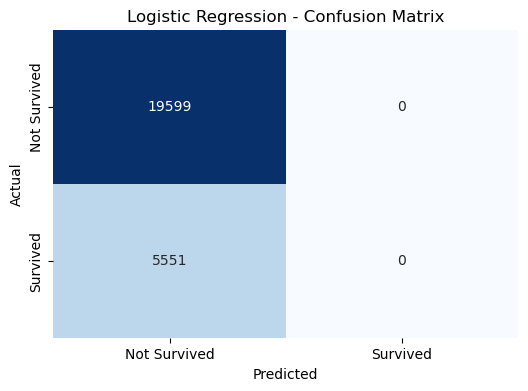

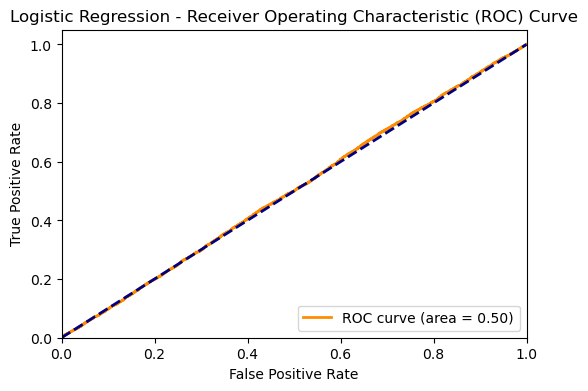


--- Training Decision Tree ---
  Accuracy: 0.6487
  Precision: 0.2189
  Recall: 0.2302
  F1-Score: 0.2244
  ROC-AUC: 0.4987


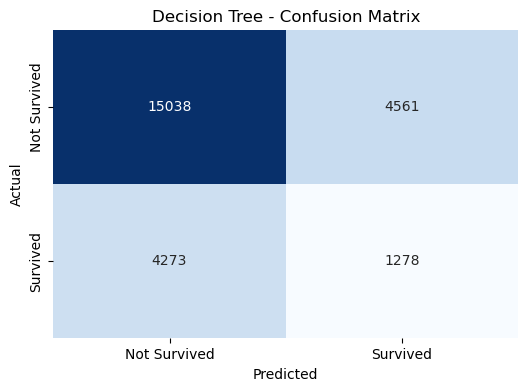

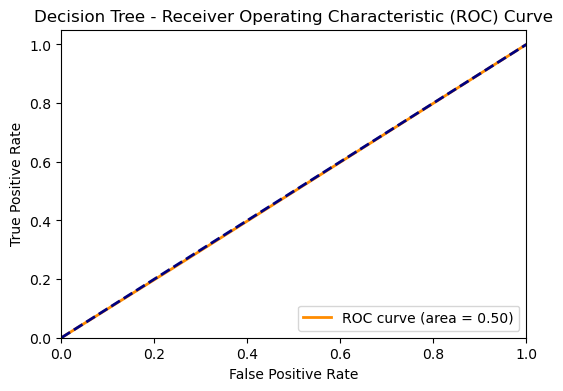


--- Training Random Forest ---
  Accuracy: 0.7638
  Precision: 0.2400
  Recall: 0.0324
  F1-Score: 0.0571
  ROC-AUC: 0.4867


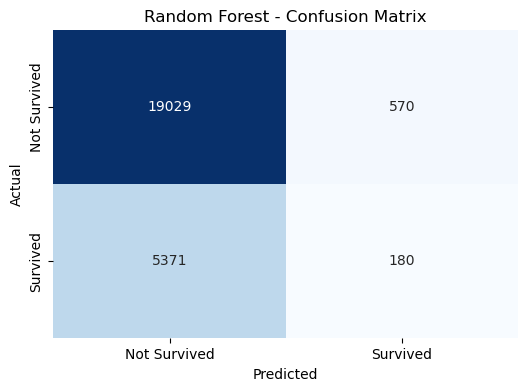

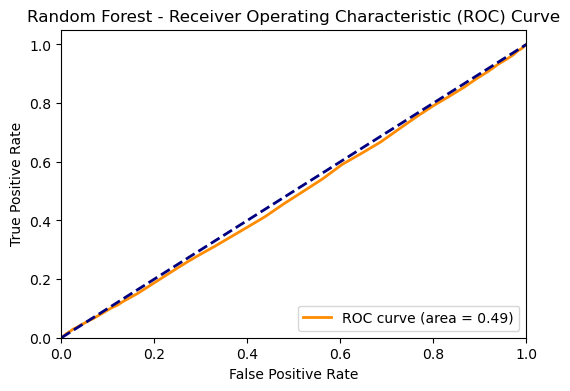


--- Training Gradient Boosting ---
  Accuracy: 0.7793
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: 0.5028


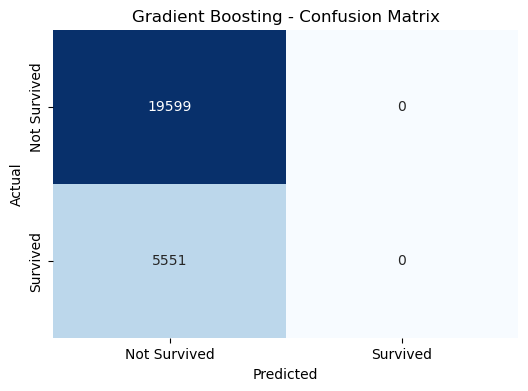

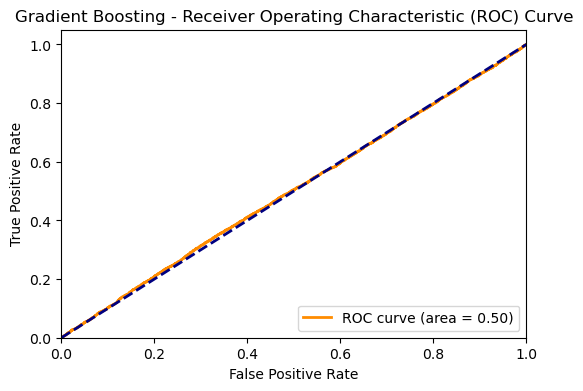


--- Training Support Vector Machine (SVC) ---


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine (SVC)': SVC(probability=True, random_state=42) # probability=True for ROC-AUC
    # 'K-Nearest Neighbors': KNeighborsClassifier() # Requires careful scaling
}

# Store model performance
model_performance = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    # Create a pipeline that first preprocesses, then trains the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1=survived)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_val = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

print("\n### Summary of Model Performance:")
performance_df = pd.DataFrame(model_performance).T
print(performance_df.sort_values(by='ROC-AUC', ascending=False))

